In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [8]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.6776 - loss: 0.5754 - val_accuracy: 0.8442 - val_loss: 0.3680
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.8678 - loss: 0.3284 - val_accuracy: 0.8290 - val_loss: 0.3816
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.8897 - loss: 0.2786 - val_accuracy: 0.8548 - val_loss: 0.3674
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.9083 - loss: 0.2360 - val_accuracy: 0.8540 - val_loss: 0.3928
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9258 - loss: 0.1908 - val_accuracy: 0.8390 - val_loss: 0.4042


In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8383 - loss: 0.4151
Test Accuracy: 0.84


In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8383 - loss: 0.4151
Test Accuracy: 0.84


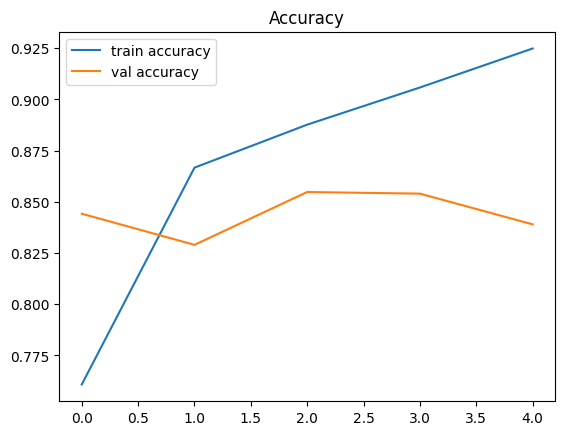

In [12]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [17]:
sample_review = x_test[1].reshape(1, -1)
prediction = model.predict(sample_review)
print("Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Positive
